# Linear regression utilizing gradient descent

Linear regression is the simplest ML algorithm. It convergest to the best fit line through optimization, minimizing the least squares error (the distance between the points and the line) in order to make the best predictions for unseen data points. Rather than using a Python module such as sci-kit learn, this model is built from scratch and shows the statistical mathematics involved.

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## Reading data

In [3]:
data1 = pd.read_csv("1_LR_Data1.txt", names=['X', 'y'], skiprows=1)
data1

,X,y
0,-2.00,-0.348621
1,-1.94,-0.506149
2,-1.88,-0.524830
3,-1.82,0.039308
4,-1.76,-0.424134
...,...,...
96,3.76,11.082427
97,3.82,10.766802
98,3.88,11.586825
99,3.94,11.829077


In [4]:
data2 = pd.read_csv("1_LR_Data2.txt", delimiter=' ', names=['Distance', 'Price'], skiprows=1)
data2

,Distance,Price
0,84.87882,37.9
1,306.59470,42.2
2,561.98450,47.3
3,561.98450,54.8
4,390.56840,43.1
...,...,...
409,4082.01500,15.4
410,90.45606,50.0
411,390.96960,40.6
412,104.81010,52.5


In [62]:
X_1 = pd.DataFrame(data1.X)
y_1 = pd.DataFrame(data1.y)
print(data1.shape, '\n')
print(X_1, y_1)

(101, 2) 

        X
0   -2.00
1   -1.94
2   -1.88
3   -1.82
4   -1.76
..    ...
96   3.76
97   3.82
98   3.88
99   3.94
100  4.00

[101 rows x 1 columns]              y
0    -0.348621
1    -0.506149
2    -0.524830
3     0.039308
4    -0.424134
..         ...
96   11.082427
97   10.766802
98   11.586825
99   11.829077
100  11.812561

[101 rows x 1 columns]


In [63]:
X_2 = pd.DataFrame(data2.Distance)
y_2 = pd.DataFrame(data2.Price)
print(data2.shape, '\n')
print(X_2, y_2)

(414, 2) 

       Distance
0      84.87882
1     306.59470
2     561.98450
3     561.98450
4     390.56840
..          ...
409  4082.01500
410    90.45606
411   390.96960
412   104.81010
413    90.45606

[414 rows x 1 columns]      Price
0     37.9
1     42.2
2     47.3
3     54.8
4     43.1
..     ...
409   15.4
410   50.0
411   40.6
412   52.5
413   63.9

[414 rows x 1 columns]


In [64]:
# Normalize the Distance axis of Dataset 2 (feature scaling)
X_2 = (X_2 - X_2.mean())/(X_2.std())

In [66]:
# Numpy arrays for polyfit function
data1_np = data1.T.to_numpy()
X_1_np = data1_np[0]
y_1_np = data1_np[1]

data2_np = data2.T.to_numpy()
X_2_np = data2_np[0]
y_2_np = data2_np[1]

In [69]:
X_2_np = (X_2_np - X_2_np.mean())/(X_2_np.std())

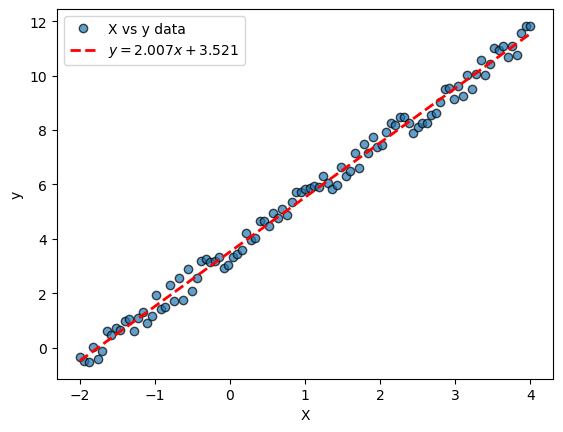

In [67]:
fig, ax = plt.subplots()

ax.plot(X_1, y_1,'o', alpha=0.7, markeredgecolor='k',\
         label ='X vs y data')

ax.set_xlabel('X')
ax.set_ylabel('y')

xlin = np.linspace(min(X_1_np),max(X_1_np),100)

p = np.polyfit(X_1_np, y_1_np, 1)
a, b = p[0], p[1]

ylin = a*xlin + b
#print(a,b)

ax.plot(xlin,ylin,'--r',lw=2, label='$y=2.007x + 3.521$')

ax.legend()
plt.show()

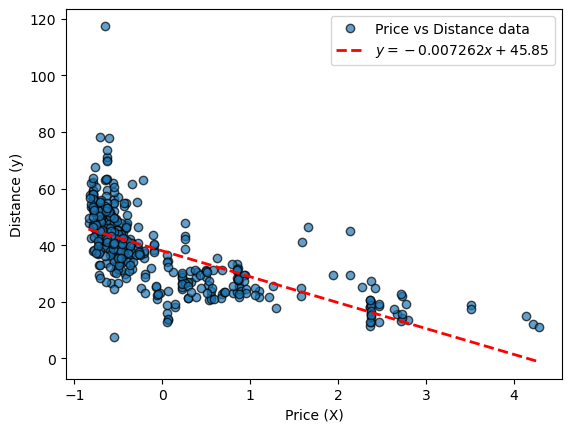

In [70]:
fig, ax = plt.subplots()

ax.plot(X_2, y_2,'o', alpha=0.7, markeredgecolor='k',\
         label ='Price vs Distance data')

ax.set_xlabel('Price (X)')
ax.set_ylabel('Distance (y)')

xlin = np.linspace(min(X_2_np),max(X_2_np),100)

p = np.polyfit(X_2_np, y_2_np, 1)
a, b = p[0], p[1]

ylin = a*xlin + b
#print(a,b)

ax.plot(xlin,ylin,'--r',lw=2, label='$y=-0.007262x + 45.85$')

ax.legend()
plt.show()

## Gradient Descent

In [92]:
def cost_function(X, y, theta):
    
    m = len(X) # number of samples
    J = (1/(2*m))*np.sum((X.dot(theta)-y)**2) # cost function
    
    return J


def gradient_descent(X, y, theta, alpha, tol, imax):
    
    m = len(X)
    loss_history = []
    theta_history = []

    for iteration in range(imax):
        loss = X.dot(theta)-y
        gradient = X.T.dot(loss)/m
        theta -= alpha*gradient
        cost = cost_function(X, y, theta)
        theta_step = [theta[0], theta[1]]
        theta_history.append(theta_step) # Creating each step in animation
        if cost <= tol:
            break
        loss_history.append(cost)

    return theta, loss_history, theta_history

## Running the models

In [72]:
# Column of ones inserted into the samples
X_1['Intercept'] = 1
X_2['Intercept'] = 1

In [73]:
# First dataset

X_1 = np.array(X_1) # Convert arrays to numpy for easier operations
y_1 = np.array(y_1).flatten()

theta = np.array([0.0, 0.0]) # Start theta parameters at zero
alpha = 0.01 # learning rate
tol = 10e-8 # tolerance
imax = 1000 # maximum number of iterations

(theta1, loss1, theta_history1) = gradient_descent(X_1, y_1, theta, alpha, tol, imax)

a1 = theta1[0]
b1 = theta1[1]

print('Slope: ', a1, '\n')
print('Intercept: ', b1, '\n')
print('Iterations: ', len(loss1), '\n')
print('First loss step: ', loss1[0], '\n')
print('Final loss step: ', loss1[-1])

Slope:  2.0074173129965387 

Intercept:  3.519158022787877 

Iterations:  1000 

First loss step:  19.855005443694697 

Final loss step:  0.04481254985319138


In [103]:
# Second dataset

X_2 = np.array(X_2)
y_2 = np.array(y_2).flatten()

# Feature scaling the Price (X) axis
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 1))
#X_2 = scaler.fit_transform(X_2)
#X_2[:,0] = (X_2[:,0] - np.mean(X_2[:,0]))/(np.max(X_2[:,0]) - np.min(X_2[:,0]))
#X_2[:,0] = (X_2[:,0] - np.mean(X_2[:,0]))/(np.std(X_2[:,0]))

theta = np.array([0.0, 0.0])
alpha = 0.1 # learning rate
tol = 10e-5 # tolerance
imax = 1000 # maximum number of iterations

(theta2, loss2, theta_history2) = gradient_descent(X_2, y_2, theta, alpha, tol, imax)
a2 = theta2[0]
b2 = theta2[1]

#a2 = a2/(np.mean(X_2))
#b2 -= a1*(np.mean(X_2))/(np.max(X_2) - np.min(X_2))

print('Slope: ', a2, '\n')
print('Intercept: ', b2, '\n')
print('Iterations: ', len(loss2), '\n')
print('First loss step: ', loss2[0], '\n')
print('Final loss step: ', loss2[-1])

Slope:  -9.165505029613536 

Intercept:  37.98019323671494 

Iterations:  1000 

First loss step:  668.6120472583359 

Final loss step:  50.44287479899793


## Plotting data with best fit line from linear regression

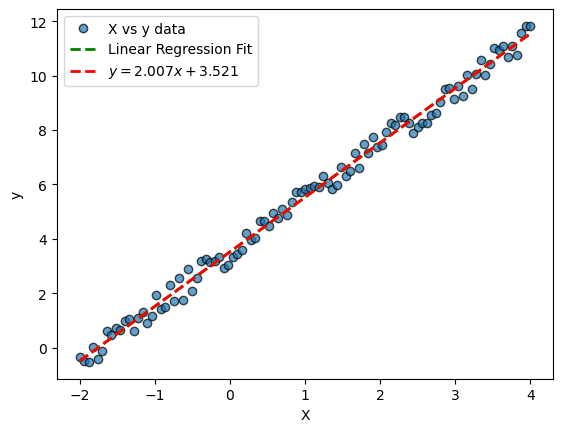

In [77]:
fig, ax = plt.subplots()

ax.plot(X_1_np, y_1_np,'o', alpha=0.7, markeredgecolor='k',\
         label ='X vs y data')

ax.set_xlabel('X')
ax.set_ylabel('y')

xlin = np.linspace(min(X_1_np),max(X_1_np),100)
ylin_lr = a1*xlin + b1
ax.plot(xlin,ylin_lr,'--g',lw=2, label='Linear Regression Fit')

# Benchmark
p = np.polyfit(X_1_np, y_1_np, 1)
a, b = p[0], p[1]

ylin = a*xlin + b
ax.plot(xlin,ylin,'--r',lw=2, label='$y=2.007x + 3.521$')

ax.legend()
fig.save_fig('HW1')
plt.show()

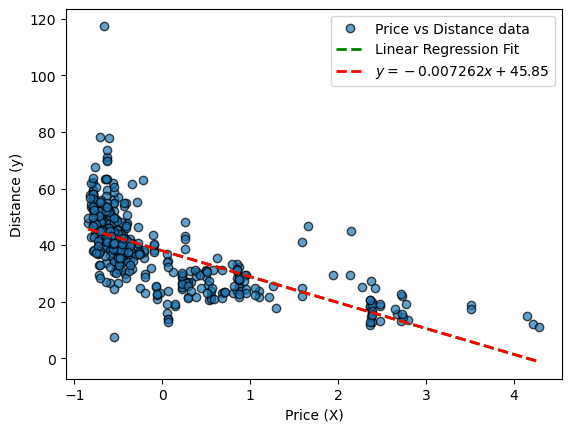

In [88]:
fig, ax = plt.subplots()

ax.plot(X_2_np, y_2_np,'o', alpha=0.7, markeredgecolor='k',\
         label ='Price vs Distance data')

ax.set_xlabel('Price (X)')
ax.set_ylabel('Distance (y)')

xlin = np.linspace(min(X_2_np),max(X_2_np),100)
ylin_lr = a2*xlin + b2
ax.plot(xlin,ylin_lr,'--g',lw=2, label='Linear Regression Fit')

# Benchmark
p = np.polyfit(X_2_np, y_2_np, 1)
a, b = p[0], p[1]

ylin = a*xlin + b
ax.plot(xlin,ylin,'--r',lw=2, label='$y=-0.007262x + 45.85$')

ax.legend()
plt.show()

## Animation of convergence

In [399]:
# First Dataset

fig, ax = plt.subplots()

output = plt.plot([])
line = output[0]
#OR use: 
# line, = plt.plot([])

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend()

ax.plot(X_1_np, y_1_np,'o', alpha=0.7, markeredgecolor='k',\
         label ='X vs y data')

xlin = np.linspace(min(X_1_np),max(X_1_np),100)

p = np.polyfit(X_1_np, y_1_np, 1)
a, b = p[0], p[1]

ylin = a*xlin + b
ax.plot(xlin,ylin,'--r',lw=2, label='$y=2.007x + 3.521$')

def animate(frame):
    #print(frame)

    #update plot
    ylin_lr = theta_history1[frame][0]*xlin + theta_history1[frame][1]
    
    #ax.plot(xlin,ylin_lr,'--g',lw=2, label='$y=2.007x + 3.521$')
    line.set_data(xlin, ylin_lr)
    line.set_color('green')
    line.set_linestyle('--')
    line.set_linewidth(2)
    line.set_label('Linear Regression Fit')
    
anim = FuncAnimation(fig, animate, frames=len(theta_history1))

# Save to a gif file.
anim.save('1_LR1.gif', fps=50)

plt.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [106]:
# Second Dataset

fig, ax = plt.subplots()

output = plt.plot([])
line = output[0]
#OR use: 
# line, = plt.plot([])

ax.set_xlabel('Distance')
ax.set_ylabel('Price')
ax.legend()

ax.plot(X_2_np, y_2_np,'o', alpha=0.7, markeredgecolor='k',\
         label ='Price vs Distance data')

xlin = np.linspace(min(X_2_np),max(X_2_np),100)

p = np.polyfit(X_2_np, y_2_np, 1)
a, b = p[0], p[1]

ylin = a*xlin + b
ax.plot(xlin,ylin,'--r',lw=2, label='$y=-0.007262x + 45.85$')

def animate(frame):
    #print(frame)

    #update plot
    ylin_lr = theta_history2[frame][0]*xlin + theta_history2[frame][1]
    
    #ax.plot(xlin,ylin_lr,'--g',lw=2, label='$y=-0.007262x + 45.85$')
    line.set_data(xlin, ylin_lr)
    line.set_color('green')
    line.set_linestyle('--')
    line.set_linewidth(2)
    line.set_label('Linear Regression Fit')
    
anim = FuncAnimation(fig, animate, frames=len(theta_history2))

# Save to a gif file.
anim.save('1_LR2.gif', fps=50)

plt.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
